In [2]:
#
# Chapter 6: p279
# Modeling a tubular chemical reactor with dispersion; treating multiple fields
#

In [22]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [44]:
def ratefn(t, c, cf_in, L, k1, k2, D, vz, nz):
    
    cm = c.reshape((nz, 4))
    dz = L / (nz + 1.0)
    
    # rxn rate equations at each grid point
    r = np.zeros((nz, 4))
    r[:, 0] = -k1 * cm[:, 0] * cm[:, 1]
    r[:, 1] = -k1 * cm[:, 0] * cm[:, 1] - k2 * cm[:, 1] * cm[:, 2]
    r[:, 2] = k1 * cm[:, 0] * cm[:, 1] - k2 * cm[:, 1] * cm[:, 2]
    r[:, 3] = k2 * cm[:, 1] * cm[:, 2]
    
    # rate of each species at each grid point
    
    dcm = np.zeros((nz, 4))
    # rate at internal grid points
    for i in range(1, nz - 1):
        for k in range(4):
            dcm[i, k] = -vz * (cm[i, k] - cm[i - 1, k]) / dz + D * (cm[i + 1, k] - 2 * cm[i, k] + cm[i - 1, k]) / dz**2 + r[i, k]
    
    # rate at outlet edge grid
    for k in range(4):
        i = nz - 1
        dcm[i, k] = -vz * (cm[i, k] - cm[i - 1, k]) / dz + D * (cm[i, k] - 2 * cm[i, k] + cm[i - 1, k]) / dz**2 + r[i, k]
    
    # rate at inlet edge grid
    Pe_loc = vz * dz / D
    cin = np.zeros(4)
    for k in range(4):
        i = 0
        cin[k] = (Pe_loc * cf_in[k] + cm[i, k]) / (1.0 + Pe_loc)
        dcm[i, k] = -vz * (cm[i, k] - cin[k]) / dz + D * (cm[i + 1, k] - 2 * cm[i, k] + cin[k]) / dz**2 + r[i, k]
        
    dc = np.reshape(dcm, nz * 4)
        
    return dc

In [45]:
L = 10
vz = 1
D = 1e-4
k1 = 1
k2 = 1
cf_in = np.array([1.0, 1.0, 0.0, 0.0])
nz = 50

In [46]:
c0 =  np.zeros(nz * 4)
c0[[i * 4 for i in range(nz)]] = 1
c0.reshape((nz,4))[range(nz - 3, nz), :]

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [47]:
ratefn_l = lambda t, c: ratefn(t, c, cf_in, L, k1, k2, D, vz, nz)

In [79]:
csol = solve_ivp(ratefn_l, [0, 20], c0, method = 'BDF', t_eval = [2, 4, 6, 8, 10, 20])

In [80]:
csol.t.shape, csol.y.shape

((6,), (200, 6))

In [81]:
csol_A = csol.y.reshape((nz, 4, -1))
csol_A.shape

(50, 4, 6)

In [82]:
dz = L / (nz + 1)
z = np.arange(0, nz * dz, dz)
z

array([0.        , 0.19607843, 0.39215686, 0.58823529, 0.78431373,
       0.98039216, 1.17647059, 1.37254902, 1.56862745, 1.76470588,
       1.96078431, 2.15686275, 2.35294118, 2.54901961, 2.74509804,
       2.94117647, 3.1372549 , 3.33333333, 3.52941176, 3.7254902 ,
       3.92156863, 4.11764706, 4.31372549, 4.50980392, 4.70588235,
       4.90196078, 5.09803922, 5.29411765, 5.49019608, 5.68627451,
       5.88235294, 6.07843137, 6.2745098 , 6.47058824, 6.66666667,
       6.8627451 , 7.05882353, 7.25490196, 7.45098039, 7.64705882,
       7.84313725, 8.03921569, 8.23529412, 8.43137255, 8.62745098,
       8.82352941, 9.01960784, 9.21568627, 9.41176471, 9.60784314,
       9.80392157])

Text(0, 0.5, 'cA')

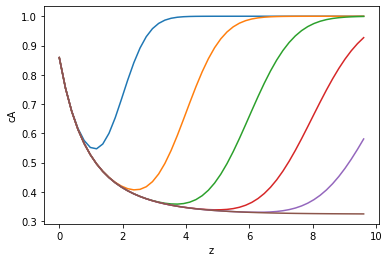

In [83]:
# Plot A
plt.plot(z[:-1], csol_A[:, 0, :])
plt.xlabel('z')
plt.ylabel('cA')

Text(0.5, 0, 'cB')

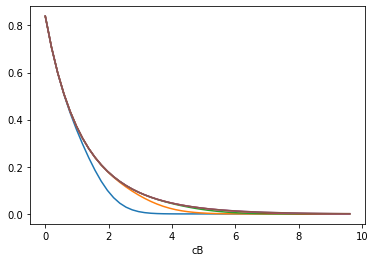

In [84]:
# Plot B
plt.plot(z[:-1], csol_A[:, 1, :])
plt.xlabel('z')
plt.xlabel('cB')

Text(0.5, 0, 'cC')

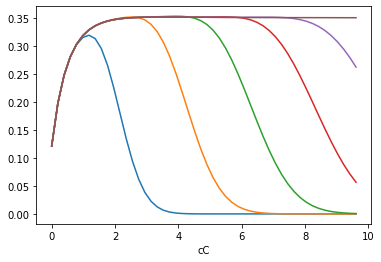

In [85]:
# Plot C
plt.plot(z[:-1], csol_A[:, 2, :])
plt.xlabel('z')
plt.xlabel('cC')

Text(0.5, 0, 'cD')

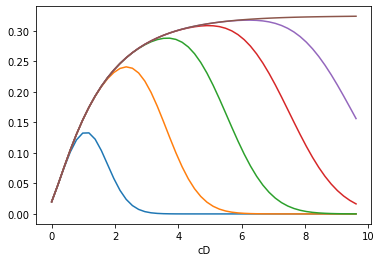

In [86]:
# Plot D
plt.plot(z[:-1], csol_A[:, 3, :])
plt.xlabel('z')
plt.xlabel('cD')